In [1]:
import os
import pandas as pd
import numpy as np

from IPython.display import Image
from subprocess import call

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import preprocessing
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

%matplotlib inline

In [2]:
# Paramns
load_model = False
replace_model = True

In [3]:
dataset = pd.read_csv('dataset_final_treat.csv')
dataset.head()

,stimul,3_seconds_before,max_variation_3_init,size_instantly_before_stimul,size_instantly_after_stimul,max_variation_end_3,3_seconds_after,max_variation_3_5,5_seconds_after,max_variation_5_6,6_seconds_after,max_variation_6_10,10_seconds_after,max_variation_10_15,15_seconds_after,classify
0,GREEN,NaN,75.499630,148.101109,86.564969,85.859824,77.413905,16.322670,79.548213,5.807754,75.612416,94.557429,NaN,36.423620,NaN,Alterado
1,WHITE,71.064351,16.322670,75.921845,40.385230,53.387231,58.089947,15.525845,63.182150,13.951668,74.125900,36.922826,90.458893,56.981451,NaN,Alterado
2,RED,91.930873,9.385295,92.801719,49.058049,35.653703,79.085347,7.341944,78.327185,30.556769,70.664204,83.370715,96.944942,126.174200,170.131519,Alterado
3,BLUE,103.827673,114.258446,135.622956,52.562305,77.406563,69.620100,18.853719,83.177519,3.867221,85.642825,68.658118,NaN,63.930862,NaN,Alterado
4,GREEN,73.363492,21.154029,86.163943,72.408206,60.984162,68.086146,22.232613,75.391691,43.118221,NaN,48.833691,NaN,7.567916,NaN,Alterado


In [4]:
# columns_drop = ['3_seconds_after', '15_seconds_after', 'max_value3', 'stimul', '3_seconds_before'] # Accuracy: 0.8539 (+/- 0.1527)
# columns_drop = ['min_value1','min_value2','min_value3','max_value1','max_value2','max_value3']
columns_drop = []

if len(columns_drop) > 0:
    dataset = dataset.drop(columns_drop, axis=1)

In [5]:
if 'stimul' in dataset.columns:
    mask = dataset.stimul.duplicated()
    print(dataset.stimul[~mask])
    new_stimuls = {'GREEN': 0, 'WHITE': 1, 'RED': 2, 'BLUE': 3}
    
    for index, item in dataset.iterrows():
        dataset['stimul'][index] = new_stimuls[item.stimul]

0    GREEN
1    WHITE
2      RED
3     BLUE
Name: stimul, dtype: object


C:\Users\marco\anaconda3\envs\Classify\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [6]:
if 'classify' in dataset:
    for index, item in dataset.iterrows():
        if item.classify != 'Atermo':
            dataset['classify'][index] = 'Alterado'

C:\Users\marco\anaconda3\envs\Classify\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
if 'classify' in dataset.columns:
    mask = dataset.classify.duplicated()
    print(dataset.classify[~mask])
    new_classify = {'Alterado': 0, 'Atermo': 1}

    for index, item in dataset.iterrows():
        dataset['classify'][index] = new_classify[item.classify]

0     Alterado
64      Atermo
Name: classify, dtype: object


C:\Users\marco\anaconda3\envs\Classify\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [8]:
def normalize_column(column_name):
    columns = list(dataset.columns)
    x = dataset[[column_name]]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    dataset_aux = pd.DataFrame({column_name: x_scaled[:, 0]})
    dataset.pop(column_name)
    dataset.insert(columns.index(column_name), column_name, dataset_aux)

In [9]:
# normalize_column('3_seconds_before')
# normalize_column('size_instantly_before_stimul')
# normalize_column('size_instantly_after_stimul')
# normalize_column('3_seconds_after')
# normalize_column('5_seconds_after')
# normalize_column('6_seconds_after')
# normalize_column('10_seconds_after')
# normalize_column('min_value1')
# normalize_column('min_value2')
# normalize_column('min_value3')
# normalize_column('max_value1')
# normalize_column('max_value2')
# normalize_column('max_value3')

In [10]:
dataset.head()

,stimul,3_seconds_before,max_variation_3_init,size_instantly_before_stimul,size_instantly_after_stimul,max_variation_end_3,3_seconds_after,max_variation_3_5,5_seconds_after,max_variation_5_6,6_seconds_after,max_variation_6_10,10_seconds_after,max_variation_10_15,15_seconds_after,classify
0,0,NaN,75.499630,148.101109,86.564969,85.859824,77.413905,16.322670,79.548213,5.807754,75.612416,94.557429,NaN,36.423620,NaN,0
1,1,71.064351,16.322670,75.921845,40.385230,53.387231,58.089947,15.525845,63.182150,13.951668,74.125900,36.922826,90.458893,56.981451,NaN,0
2,2,91.930873,9.385295,92.801719,49.058049,35.653703,79.085347,7.341944,78.327185,30.556769,70.664204,83.370715,96.944942,126.174200,170.131519,0
3,3,103.827673,114.258446,135.622956,52.562305,77.406563,69.620100,18.853719,83.177519,3.867221,85.642825,68.658118,NaN,63.930862,NaN,0
4,0,73.363492,21.154029,86.163943,72.408206,60.984162,68.086146,22.232613,75.391691,43.118221,NaN,48.833691,NaN,7.567916,NaN,0


In [11]:
X = dataset.copy()
X.pop('classify')
y = dataset['classify']

# X = X.fillna(X.mean())
# y = y.fillna(y.mean())

X = X.fillna(0)
y = y.fillna(0)

print(X, y)

     stimul  3_seconds_before  max_variation_3_init  \
0         0          0.000000             75.499630   
1         1         71.064351             16.322670   
2         2         91.930873              9.385295   
3         3        103.827673            114.258446   
4         0         73.363492             21.154029   
..      ...               ...                   ...   
166       2          0.000000             23.027272   
167       0        106.914244             11.069984   
168       0        129.892041             24.211070   
169       0        146.706516             11.207517   
170       3        154.907280              9.342325   

     size_instantly_before_stimul  size_instantly_after_stimul  \
0                      148.101109                    86.564969   
1                       75.921845                    40.385230   
2                       92.801719                    49.058049   
3                      135.622956                    52.562305   
4        

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
clf = tree.DecisionTreeClassifier()

if load_model:
    from joblib import load
    clf = load('classify_j48.joblib')
else:
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8269230769230769


In [16]:
aux = dataset.copy()
aux.pop('classify')

feature_imp = pd.Series(clf.feature_importances_,index=list(aux.columns)).sort_values(ascending=False)
feature_imp

15_seconds_after                0.242636
6_seconds_after                 0.208087
max_variation_end_3             0.152438
size_instantly_after_stimul     0.088924
size_instantly_before_stimul    0.085538
max_variation_3_5               0.067987
5_seconds_after                 0.051738
max_variation_6_10              0.032322
10_seconds_after                0.031162
max_variation_10_15             0.028854
3_seconds_before                0.010315
max_variation_5_6               0.000000
3_seconds_after                 0.000000
max_variation_3_init            0.000000
stimul                          0.000000
dtype: float64

No handles with labels found to put in legend.


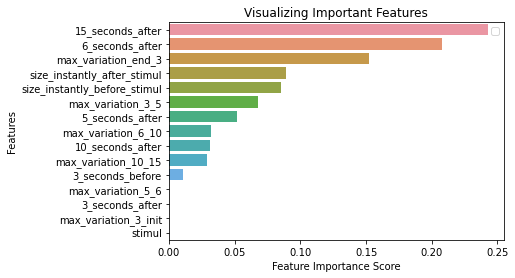

In [17]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [18]:
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.8654 (+/- 0.1650)


In [19]:
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print("f1_macro: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

f1_macro: 0.8544 (+/- 0.1654)


In [20]:
# tests instances

label = {0: 'Alterado', 1: 'Atermo'}

x_test = dataset.copy()
x_test.pop('classify')
y_test = dataset.classify
log_execute = []
for index, value in x_test.iterrows():
    aux = value
    aux = aux.fillna(0)
    aux = (aux.to_numpy())
    pred = clf.predict([aux])
    pred = label[pred[0]]
    lab = label[y.iloc[index]]
    correct = 'CORRETO' if pred == lab else 'INCORRETO'
    log_execute.append("Registro {} index {} previsto: {}, label: {}!".format(index+1, correct, pred, lab))
    
with open('log_execute.txt', 'a') as file_writer:
    for line in log_execute:
        file_writer.write('{}\n'.format(line))

In [21]:
aux = dataset.copy()
aux.pop('classify')

target = ['Altered', 'Aterm']

export_graphviz(clf, out_file='tree.dot', feature_names=aux.columns, class_names=target,
                rounded=True, special_characters=True, proportion=False, precision=2, filled=True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
Image(filename = 'tree.png')

In [22]:
if replace_model:
    # Save model
    print('Save/Replace model!')
    from joblib import dump
    dump(clf, 'classify_j48.joblib')

Save/Replace model!
